In [4]:
import pandas as pd  # for data manipulation and analysis
from datetime import datetime
import plotly.graph_objects as go # interactive visualizations
import matplotlib.pyplot as plt # for static, publication-quality visualizations.
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


In [5]:
#F:\level 2\semester 3\DS Methology\DSM final Project
data = pd.read_csv("F:/level 2/semester 3/DS Methology/DSM final Project/Student_performance_10k.csv",encoding= 'ISO-8859-1')
df = pd.DataFrame(data)
df.head()

,roll_no,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,science_score,total_score,grade
0,std-01,male,group D,some college,1.0,1.0,89,38.0,85.0,26.0,238.0,C
1,std-02,male,group B,high school,1.0,0.0,65,100.0,67.0,96.0,328.0,A
2,std-03,male,group C,master's degree,1.0,0.0,10,99.0,97.0,58.0,264.0,B
3,std-04,male,group D,some college,1.0,1.0,22,51.0,41.0,84.0,198.0,D
4,std-05,male,group C,some college,0.0,1.0,26,58.0,64.0,65.0,213.0,C


In [6]:
df.columns

Index(['roll_no', 'gender', 'race_ethnicity', 'parental_level_of_education',
       'lunch', 'test_preparation_course', 'math_score', 'reading_score',
       'writing_score', 'science_score', 'total_score', 'grade'],
      dtype='object')

In [7]:
df.nunique()

roll_no                        9999
gender                            5
race_ethnicity                   11
parental_level_of_education       6
lunch                             2
test_preparation_course           2
math_score                       99
reading_score                    84
writing_score                    91
science_score                    92
total_score                     257
grade                             5
dtype: int64

In [8]:
df.shape



(10000, 12)

In [9]:
df.info() 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   roll_no                      9999 non-null   object 
 1   gender                       9982 non-null   object 
 2   race_ethnicity               9977 non-null   object 
 3   parental_level_of_education  9978 non-null   object 
 4   lunch                        9976 non-null   float64
 5   test_preparation_course      9977 non-null   float64
 6   math_score                   9976 non-null   object 
 7   reading_score                9975 non-null   float64
 8   writing_score                9976 non-null   float64
 9   science_score                9977 non-null   float64
 10  total_score                  9981 non-null   float64
 11  grade                        9997 non-null   object 
dtypes: float64(6), object(6)
memory usage: 937.6+ KB


In [10]:
# 1st step delete and identifiy NA
df.isnull().sum() 


roll_no                         1
gender                         18
race_ethnicity                 23
parental_level_of_education    22
lunch                          24
test_preparation_course        23
math_score                     24
reading_score                  25
writing_score                  24
science_score                  23
total_score                    19
grade                           3
dtype: int64

In [11]:
df=df.dropna()
df.info()
#9786 row


<class 'pandas.core.frame.DataFrame'>
Index: 9787 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   roll_no                      9787 non-null   object 
 1   gender                       9787 non-null   object 
 2   race_ethnicity               9787 non-null   object 
 3   parental_level_of_education  9787 non-null   object 
 4   lunch                        9787 non-null   float64
 5   test_preparation_course      9787 non-null   float64
 6   math_score                   9787 non-null   object 
 7   reading_score                9787 non-null   float64
 8   writing_score                9787 non-null   float64
 9   science_score                9787 non-null   float64
 10  total_score                  9787 non-null   float64
 11  grade                        9787 non-null   object 
dtypes: float64(6), object(6)
memory usage: 994.0+ KB


In [12]:
# 2nd step validate data types 
# math score obj -> float
df["math_score"]=df["math_score"].replace({'\\t41':'41'})
df["math_score"]= df["math_score"].astype("float64")
#  lunch float-> int
df["lunch"]= df["lunch"].astype("int64")
# test preparation course  float -> int
df["test_preparation_course"]= df["test_preparation_course"].astype("int64")
print(df.columns)
print(type(df))




Index(['roll_no', 'gender', 'race_ethnicity', 'parental_level_of_education',
       'lunch', 'test_preparation_course', 'math_score', 'reading_score',
       'writing_score', 'science_score', 'total_score', 'grade'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9787 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   roll_no                      9787 non-null   object 
 1   gender                       9787 non-null   object 
 2   race_ethnicity               9787 non-null   object 
 3   parental_level_of_education  9787 non-null   object 
 4   lunch                        9787 non-null   int64  
 5   test_preparation_course      9787 non-null   int64  
 6   math_score                   9787 non-null   float64
 7   reading_score                9787 non-null   float64
 8   writing_score                9787 non-null   float64
 9   science_score                9787 non-null   float64
 10  total_score                  9787 non-null   float64
 11  grade                        9787 non-null   object 
dtypes: float64(5), int64(2), object(5)
memory usage: 994.0+ KB


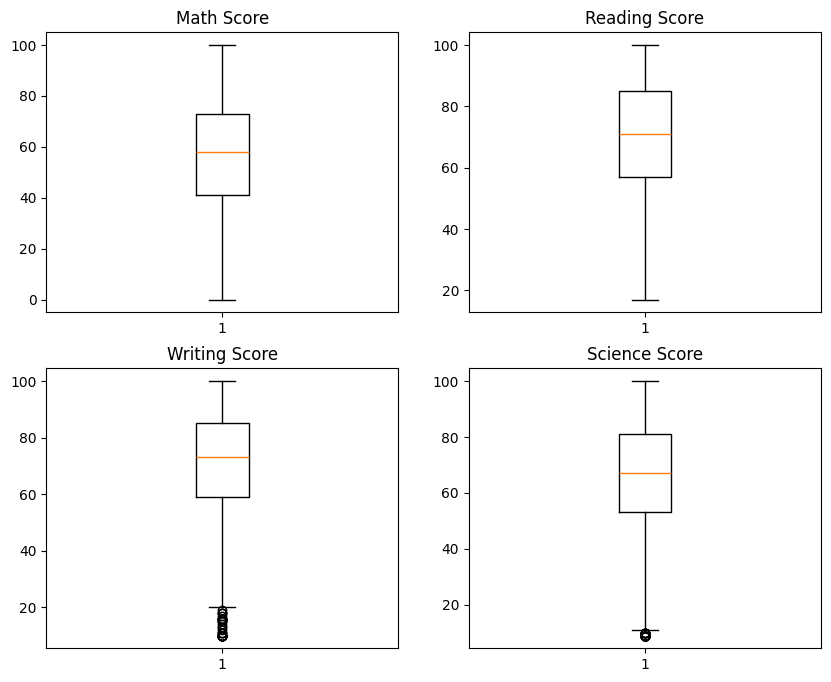

In [14]:
# 3rd calculate outliers
# Set the style for the plots
# Create a figure and axes to hold the boxplots
fig, axes = plt.subplots(2, 2, figsize=(10, 8))
# Plot each boxplot in a different subplot
axes[0, 0].boxplot(df["math_score"])
axes[0, 0].set_title("Math Score")

axes[0, 1].boxplot(df["reading_score"])
axes[0, 1].set_title("Reading Score")

axes[1, 0].boxplot(df["writing_score"])
axes[1, 0].set_title("Writing Score")

axes[1, 1].boxplot(df["science_score"])
axes[1, 1].set_title("Science Score")
plt.show()

In [15]:
# Delete outliers from writing score
Q1 = df['writing_score'].quantile(0.25)
Q3 = df['writing_score'].quantile(0.75)
IQR = Q3 - Q1
df = df[(df['writing_score'] >= Q1 - 1.5 * IQR) & (df['writing_score'] <= Q3 + 1.5 * IQR)]

# Delete outliers from science score
Q1 = df['science_score'].quantile(0.25)
Q3 = df['science_score'].quantile(0.75)
IQR = Q3 - Q1
df = df[(df['science_score'] >= Q1 - 1.5 * IQR) & (df['science_score'] <= Q3 + 1.5 * IQR)]







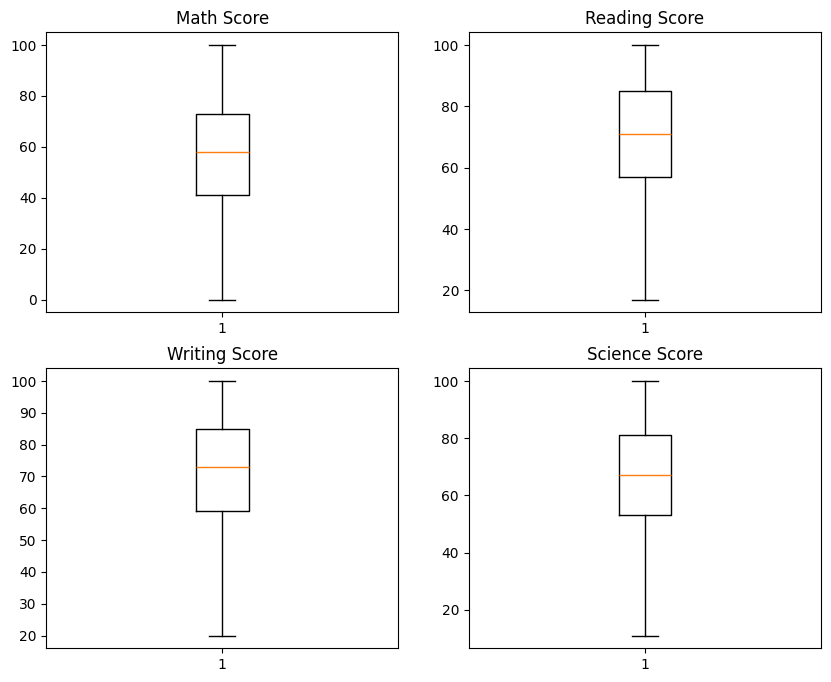

In [16]:
# check the operation 
fig, axes = plt.subplots(2, 2, figsize=(10, 8))
# Plot each boxplot in a different subplot
axes[0, 0].boxplot(df["math_score"])
axes[0, 0].set_title("Math Score")

axes[0, 1].boxplot(df["reading_score"])
axes[0, 1].set_title("Reading Score")

axes[1, 0].boxplot(df["writing_score"])
axes[1, 0].set_title("Writing Score")

axes[1, 1].boxplot(df["science_score"])
axes[1, 1].set_title("Science Score")
plt.show()

In [17]:
type(df)

pandas.core.frame.DataFrame

In [18]:
#  step 4 check data consistency
for column in ["roll_no","gender","race_ethnicity","lunch","test_preparation_course","math_score","reading_score","writing_score","science_score","grade","total_score"]:
 unique_values = df[column].unique()
 print(unique_values)
 # problems in gender and group


['std-01' 'std-02' 'std-03' ... 'std-9998' 'std-9999' 'std-10000']
['male' 'Boy' '\\tmale' 'female' 'Girl']
['group D' 'group B' 'group C' 'group E' 'group A' 'C' 'D' 'group C\\n'
 'B' 'E' 'A']
[1 0]
[1 0]
[ 89.  65.  10.  22.  26.  40.  25.  39.  47.  37.  49.  72.  11.  41.
  32.  85.  78.  68.  38.  69.  87.  42.  51.  75.  60.  20.  81.  98.
  83. 100.  24.  71.  23.  82.  35.  55.  19.  48.  29.  34.  74.  44.
  28.  43.  62.  93.  66.   0.  46.  45.  57.  54.  21.  18.  70.  30.
  97.  50.  61.  73.  88.  64.  36.  33.  76.  17.  56.  80.  53.  16.
  58.   9.   8.  79.  12.  77.  99.  67.  59.  63.  86.  31.  92.  52.
  94.   6.  13.  27.  91.  96.  14.  84.  95.  15.  90.   7.   4.   5.]
[ 38. 100.  99.  51.  58.  49.  80.  71.  57.  54.  89.  67.  77.  76.
  82.  66.  90.  98.  63.  64.  73.  86.  53.  88.  40.  62.  30.  60.
  70.  69.  65.  85.  91.  37.  78.  84.  79.  74.  95.  47.  59.  68.
  92.  81.  44.  72.  17.  34.  87.  97.  41.  50.  83.  46.  45.  43.
  93.  75.  

In [19]:
# fix inconsistensies in gender ['male' 'Boy' '\\tmale' 'female' 'Girl']
# Fix inconsistencies: 'M' becomes 'Male' and 'F' becomes 'Female'
df['gender'] = df['gender'].replace({'Boy': 'male', 'Girl': 'female','\\tmale':'male'})
df["gender"].unique()


#df.head()


array(['male', 'female'], dtype=object)

In [20]:
# fix inconsistensies in group ['group D' 'group B' 'group C' 'group E' 'group A' 'C' 'D''group C\\n' 'B' 'E' 'A']
df['race_ethnicity']= df["race_ethnicity"].replace({'C':'group C','D':'group D','group C\\n':'group C'
                                                    ,'B':'group B','E':'group E','A':'group A' })
df["race_ethnicity"].unique()

array(['group D', 'group B', 'group C', 'group E', 'group A'],
      dtype=object)

In [21]:
#  step 5 check duplicates
df.duplicated().any()

False

In [22]:
for data in ["math_score","reading_score","writing_score","science_score","total_score"]:
 is_ve= (df[data] <0).any()
 print(is_ve)

False
False
False
False
False


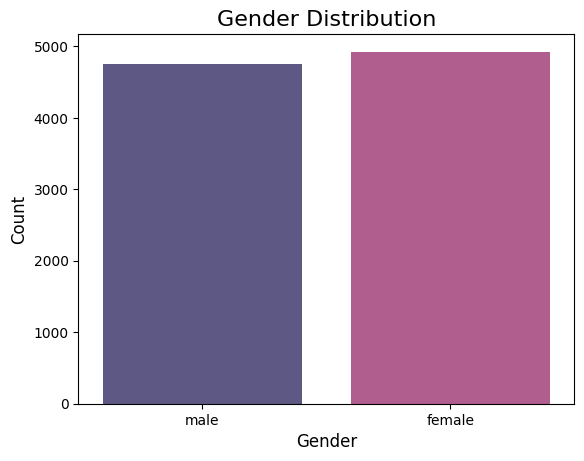

In [23]:

# Fixed code: assign `x` to `hue` and set `legend=False`
sns.countplot(data=df, x='gender', hue='gender', palette=['#58508d', '#bc5090'] , legend=False)

# Add labels and title
plt.title("Gender Distribution", fontsize=16)
plt.xlabel("Gender", fontsize=12)
plt.ylabel("Count", fontsize=12)

# Show the plot
plt.show()


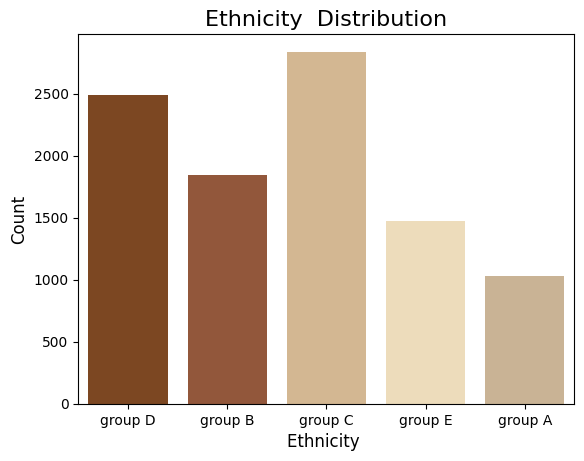

In [24]:
p =['#8B4513', '#A0522D', '#DEB887', '#F5DEB3', '#D2B48C']

sns.countplot(data=df, x='race_ethnicity', hue='race_ethnicity', palette=p  , legend=False)

# Add labels and title
plt.title("Ethnicity  Distribution", fontsize=16)
plt.xlabel("Ethnicity ", fontsize=12)
plt.ylabel("Count", fontsize=12)

# Show the plot
plt.show()

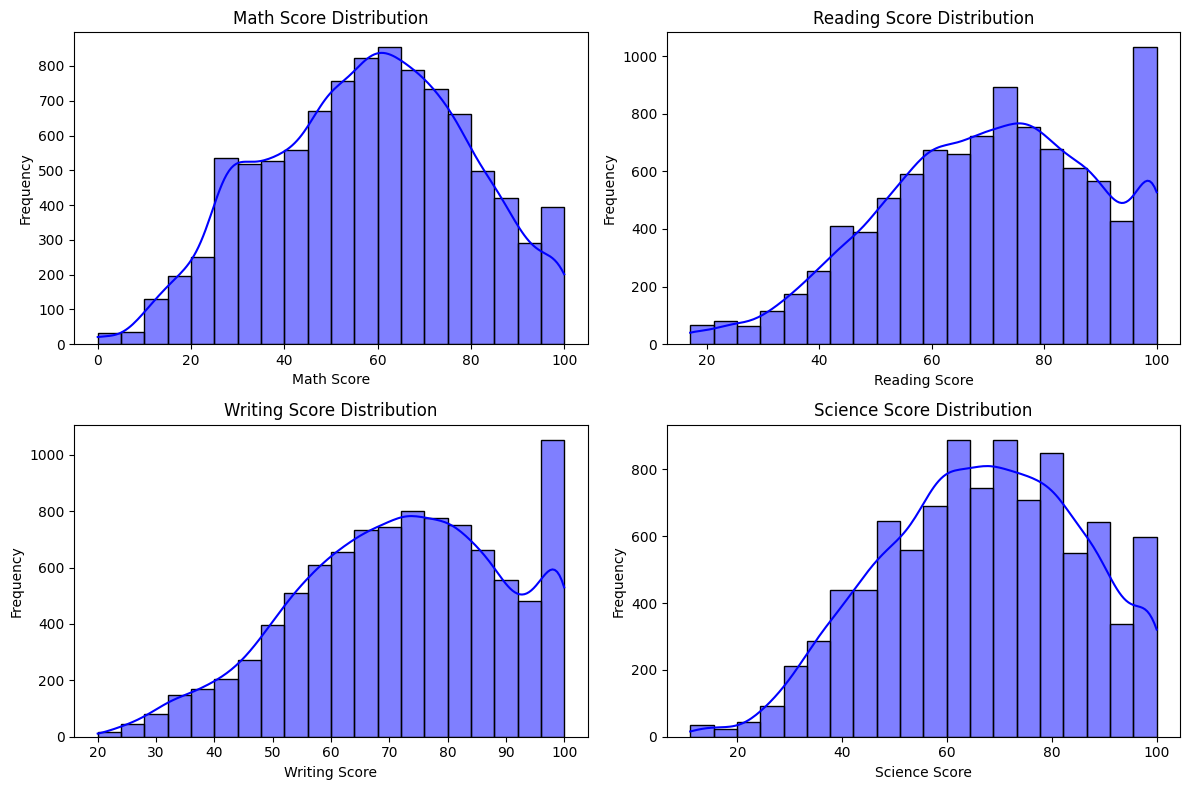

In [25]:
subjects = ['math_score', 'reading_score', 'writing_score', 'science_score']
plt.figure(figsize=(12, 8))
for i, subject in enumerate(subjects, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[subject], kde=True, bins=20, color='b')
    plt.title(f'{subject.replace("_", " ").title()} Distribution')
    plt.xlabel(subject.replace("_", " ").title())
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

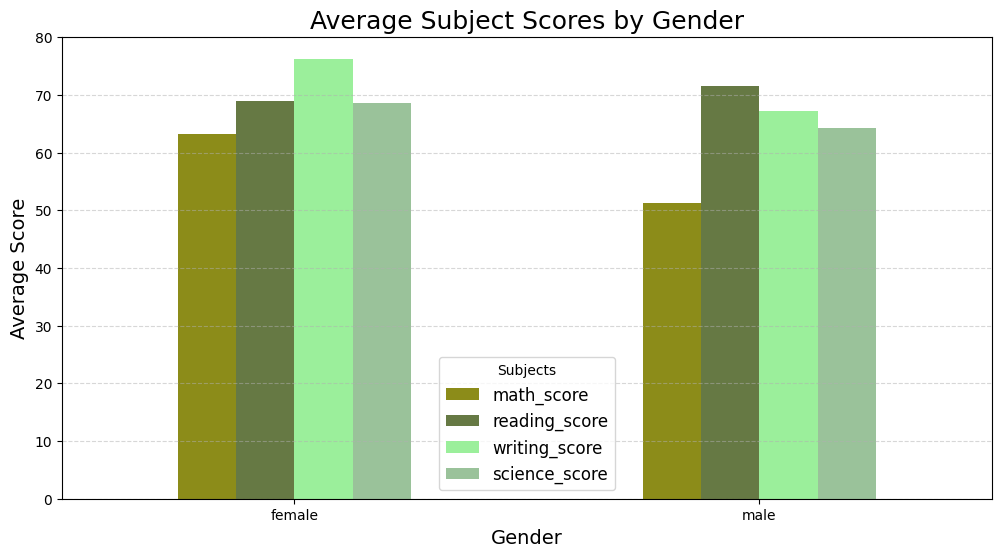

In [26]:
avg_scores_by_gender = df.groupby('gender')[['math_score', 'reading_score', 'writing_score', 'science_score']].mean()
#avg_scores_by_gender is a DataFrame that holds the average scores for each subject (Math, Reading, Writing, Science) by gender.
#.plot(kind='bar') is a method from pandas that generates a bar chart from the DataFrame.

# Plot grouped bar chart
avg_scores_by_gender.plot(kind='bar', figsize=(12, 6), color=['olive', 'darkolivegreen', 'lightgreen', 'darkseagreen'], alpha=0.9)
plt.title('Average Subject Scores by Gender', fontsize=18)
plt.ylabel('Average Score', fontsize=14)
plt.xlabel('Gender', fontsize=14)
plt.xticks(rotation=0)
plt.legend(title='Subjects', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

In [27]:
parental_level_of_education_counts=df['parental_level_of_education'].value_counts() # Count the occurrences of each parental_level_of_education
parental_level_of_education_counts.index

Index(['some college', 'high school', 'associate's degree', 'some high school',
       'bachelor's degree', 'master's degree'],
      dtype='object', name='parental_level_of_education')

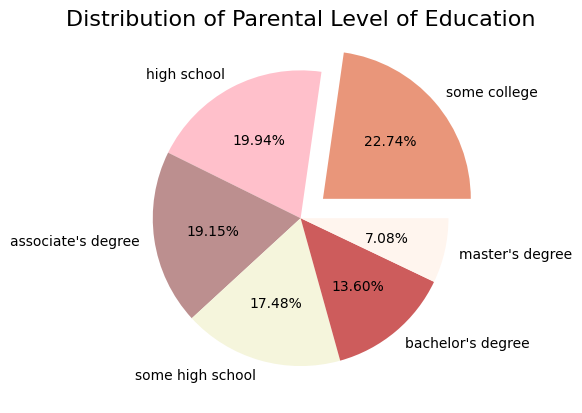

In [28]:
# Pie chart for parental level of education distribution
myexplode = [0.2, 0, 0,0,0,0]
plt.pie(parental_level_of_education_counts,autopct='%1.2f%%' ,explode =myexplode,labels=parental_level_of_education_counts.index,colors=['darksalmon','pink','rosybrown','beige','indianred','seashell'])
plt.title('Distribution of Parental Level of Education', fontsize=16)

plt.show()

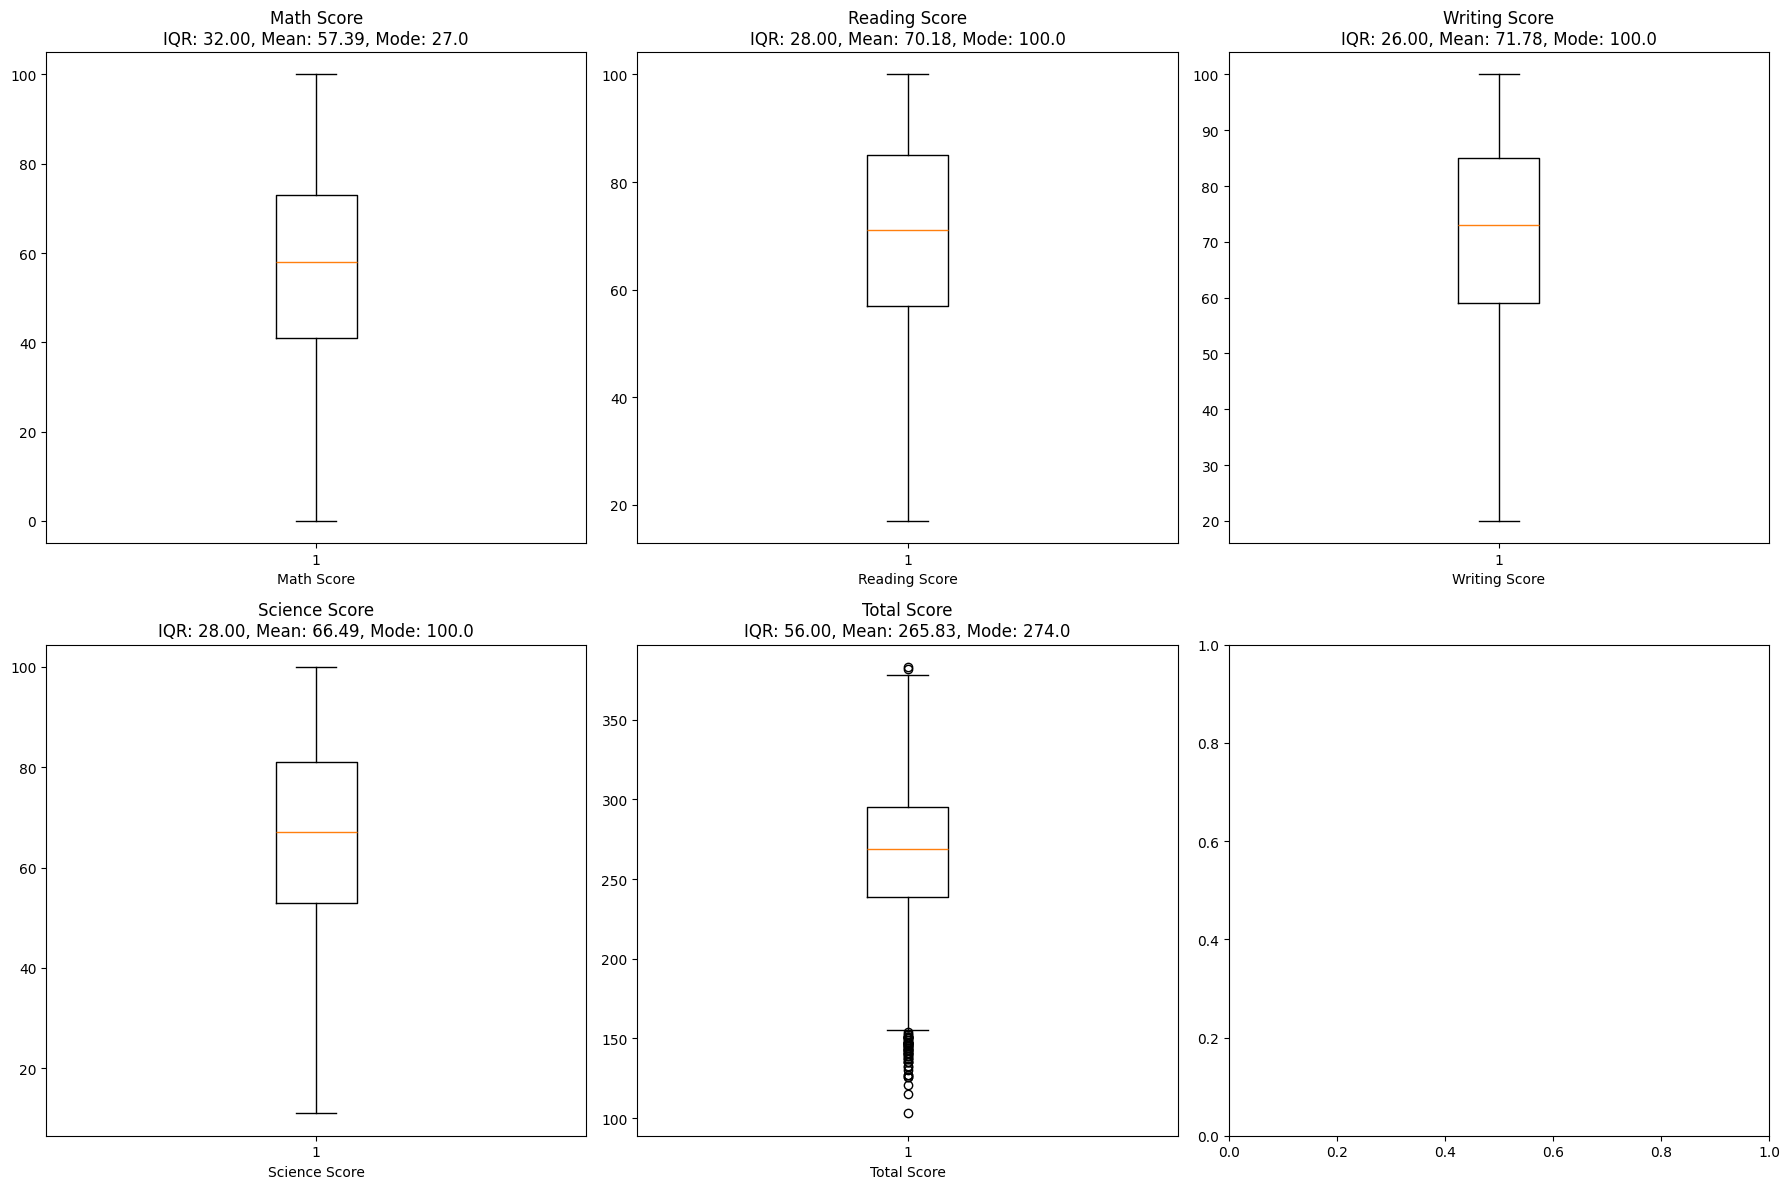

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Calculate the interquartile range, mean, and mode for each subject
math_iqr = df['math_score'].quantile([0.25, 0.75]).diff()[0.75]
math_mean = df['math_score'].mean()
math_mode = df['math_score'].mode()[0]

reading_iqr = df['reading_score'].quantile([0.25, 0.75]).diff()[0.75]
reading_mean = df['reading_score'].mean()
reading_mode = df['reading_score'].mode()[0]

writing_iqr = df['writing_score'].quantile([0.25, 0.75]).diff()[0.75]
writing_mean = df['writing_score'].mean()
writing_mode = df['writing_score'].mode()[0]

science_iqr = df['science_score'].quantile([0.25, 0.75]).diff()[0.75]
science_mean = df['science_score'].mean()
science_mode = df['science_score'].mode()[0]

total_iqr = df['total_score'].quantile([0.25, 0.75]).diff()[0.75]
total_mean = df['total_score'].mean()
total_mode = df['total_score'].mode()[0]

# Create the visualizations
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Math Score
axes[0, 0].boxplot(df['math_score'])
axes[0, 0].set_title(f'Math Score\nIQR: {math_iqr:.2f}, Mean: {math_mean:.2f}, Mode: {math_mode}')
axes[0, 0].set_xlabel('Math Score')

# Reading Score
axes[0, 1].boxplot(df['reading_score'])
axes[0, 1].set_title(f'Reading Score\nIQR: {reading_iqr:.2f}, Mean: {reading_mean:.2f}, Mode: {reading_mode}')
axes[0, 1].set_xlabel('Reading Score')

# Writing Score
axes[0, 2].boxplot(df['writing_score'])
axes[0, 2].set_title(f'Writing Score\nIQR: {writing_iqr:.2f}, Mean: {writing_mean:.2f}, Mode: {writing_mode}')
axes[0, 2].set_xlabel('Writing Score')

# Science Score
axes[1, 0].boxplot(df['science_score'])
axes[1, 0].set_title(f'Science Score\nIQR: {science_iqr:.2f}, Mean: {science_mean:.2f}, Mode: {science_mode}')
axes[1, 0].set_xlabel('Science Score')

# Total Score
axes[1, 1].boxplot(df['total_score'])
axes[1, 1].set_title(f'Total Score\nIQR: {total_iqr:.2f}, Mean: {total_mean:.2f}, Mode: {total_mode}')
axes[1, 1].set_xlabel('Total Score')

plt.tight_layout()
plt.show()


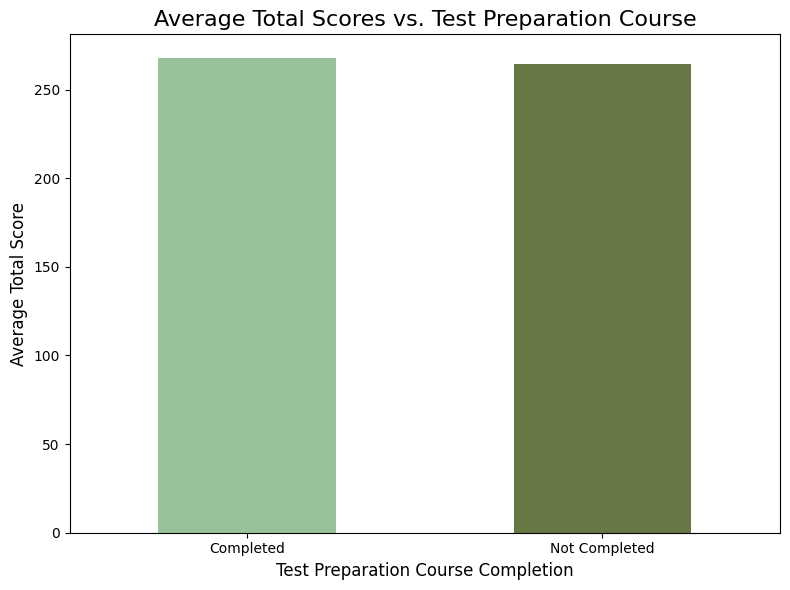

In [30]:
# Group by test preparation course and calculate the average total score
df['test_preparation_course'] = df['test_preparation_course'].replace({0: 'Not Completed', 1: 'Completed'})
avg_scores_by_preparation = df.groupby('test_preparation_course')['total_score'].mean()

# Create bar chart
plt.figure(figsize=(8, 6))
ax = avg_scores_by_preparation.plot(kind='bar', color=['darkseagreen', 'darkolivegreen'], alpha=0.9)

# Add title and labels
plt.title('Average Total Scores vs. Test Preparation Course', fontsize=16)
plt.xlabel('Test Preparation Course Completion', fontsize=12)
plt.ylabel('Average Total Score', fontsize=12)



# Display the plot
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [31]:
passing_degree = 50

df['reading_score'] < passing_degree
df['science_score'] < passing_degree
df['math_score'] < passing_degree
#df['math_score'] < passing_threshold: This creates a list of True/False for whether each student in the Math column has a score below the passing degree.
#.mean() on a True/False list (or Boolean values) calculates the percentage of True values
 #Convert the failure rates into a DataFrame for easy plotting

0       False
1       False
2        True
3        True
4        True
        ...  
9995    False
9996     True
9997    False
9998    False
9999     True
Name: math_score, Length: 9673, dtype: bool

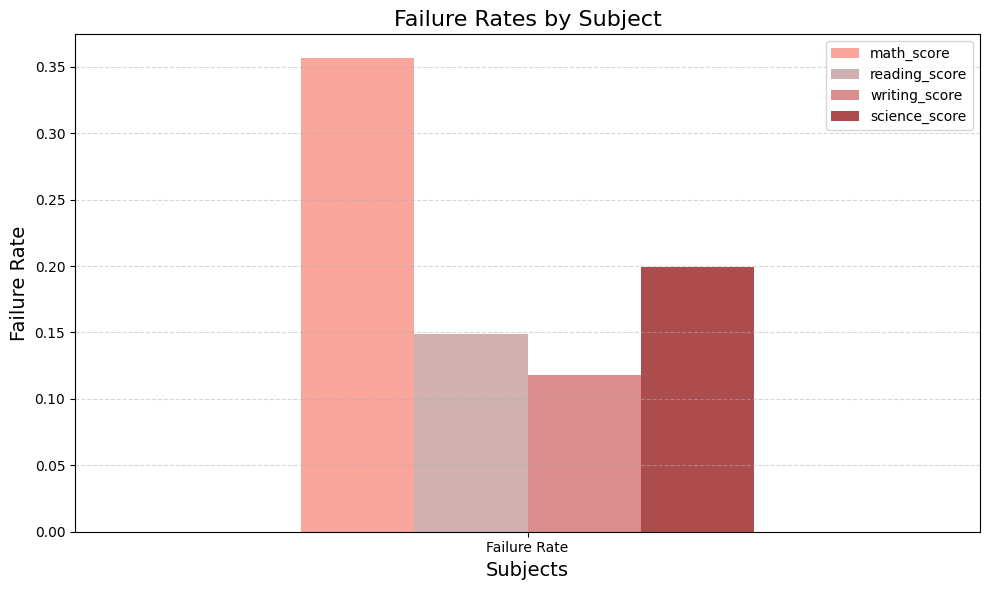

In [32]:
passing_degree = 50
# Calculate failure rates for each subject
failure_rates = {
    'math_score': (df['math_score'] < passing_degree).mean(),
    'reading_score': (df['reading_score'] < passing_degree).mean(),
    'writing_score': (df['writing_score'] < passing_degree).mean(),
    'science_score': (df['science_score'] < passing_degree).mean()
}

# Convert the dictionary to a DataFrame 
failure_rates_df = pd.DataFrame(failure_rates, index=['Failure Rate'])

# Plotting the bar chart
failure_rates_df.plot(kind='bar', figsize=(10, 6), color=['salmon','rosybrown','indianred','darkred'], alpha=0.7)

# Adding title and labels
plt.title('Failure Rates by Subject', fontsize=16)
plt.xlabel('Subjects', fontsize=14)
plt.ylabel('Failure Rate', fontsize=14)

# Display the plot
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.xticks( rotation=0)
plt.tight_layout()
plt.show()

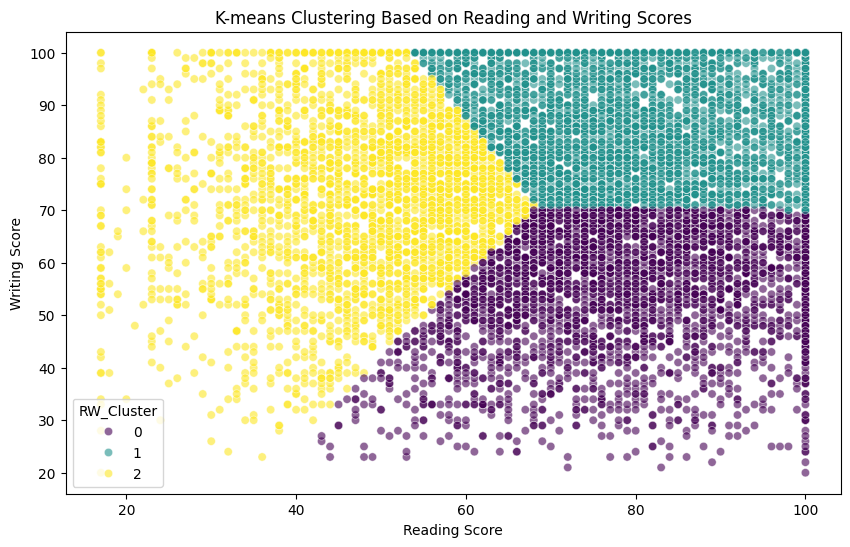

In [33]:
# Selecting reading and writing scores
reading_writing_scores = df[['reading_score', 'writing_score']]

# Standardize the data
scaler_rw = StandardScaler()
scaled_rw_scores = scaler_rw.fit_transform(reading_writing_scores)

# K-means clustering
kmeans_rw = KMeans(n_clusters=3, random_state=42)
df['RW_Cluster'] = kmeans_rw.fit_predict(scaled_rw_scores)

# Visualizing clusters for Reading and Writing Scores
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='reading_score', y='writing_score', hue='RW_Cluster', palette='viridis', alpha=0.6)
plt.title('K-means Clustering Based on Reading and Writing Scores')
plt.xlabel('Reading Score')
plt.ylabel('Writing Score')
plt.show()

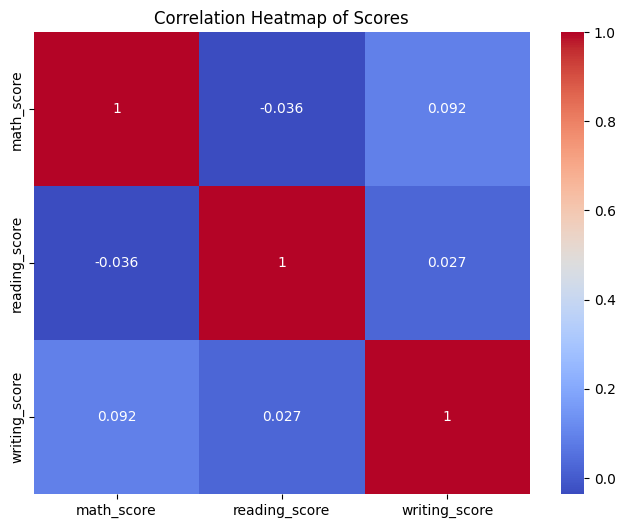

In [34]:
# Additional Analysis (Correlation Heatmap)
plt.figure(figsize=(8, 6))
correlation = df[['math_score', 'reading_score', 'writing_score']].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Scores')
plt.show()

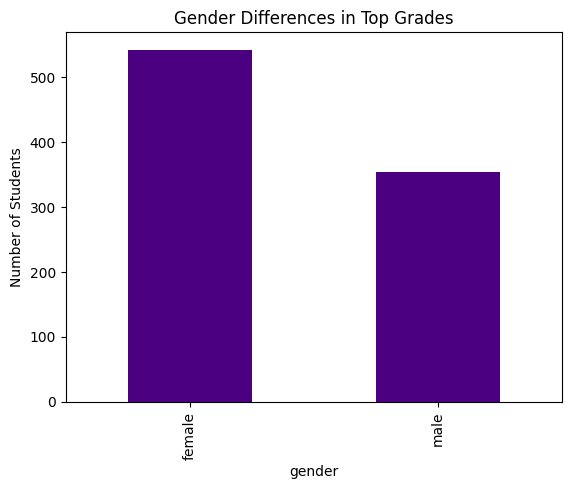

In [35]:
top_grades = df[df['grade'] == 'A'].groupby('gender').size()

top_grades.plot(kind='bar', color='Indigo',)
plt.title('Gender Differences in Top Grades')
plt.ylabel('Number of Students')
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_20828\4235309937.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Preparation_label', palette='coolwarm')


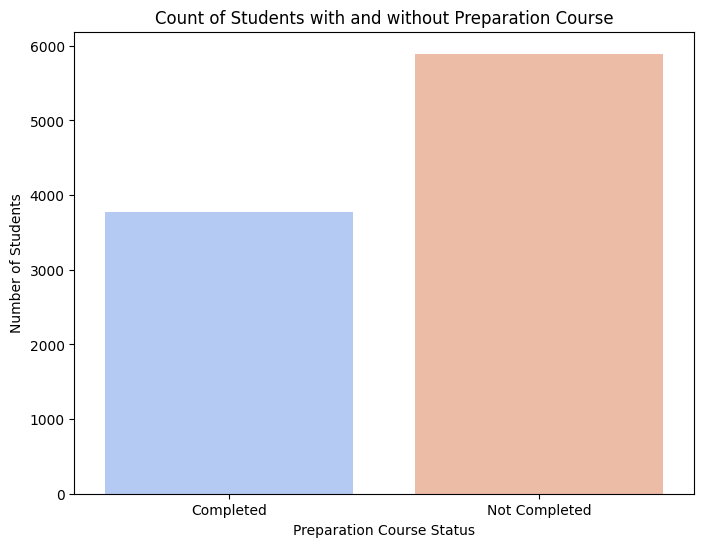

In [36]:
df['Preparation_label'] = df['test_preparation_course'].replace({0: 'No Preparation Course', 1: 'Preparation Course'})

# Histogram to count students based on preparation course
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Preparation_label', palette='coolwarm')

plt.title('Count of Students with and without Preparation Course')
plt.xlabel('Preparation Course Status')
plt.ylabel('Number of Students')
plt.show()

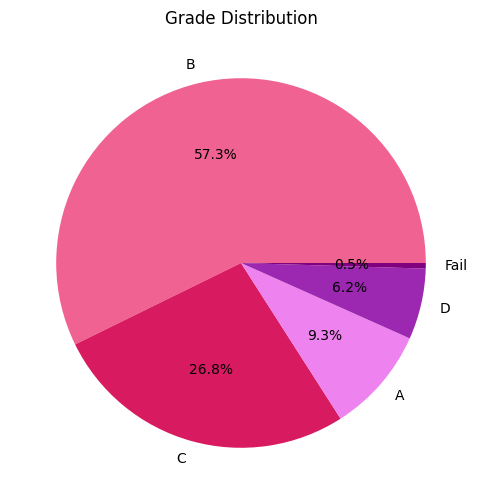

In [37]:
# Define a custom lighter pink and purple color palette
light_pink_purple_palette = ['#F06292', '#D81B60', 'violet', '#9C27B0','Purple']  # Lighter pinks and purples

# Pie Chart for Grades Distribution with lighter pink and purple colors
grade_counts = df['grade'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(grade_counts, labels=grade_counts.index, autopct='%1.1f%%', colors=light_pink_purple_palette[:len(grade_counts)])
plt.title('Grade Distribution')
plt.show()

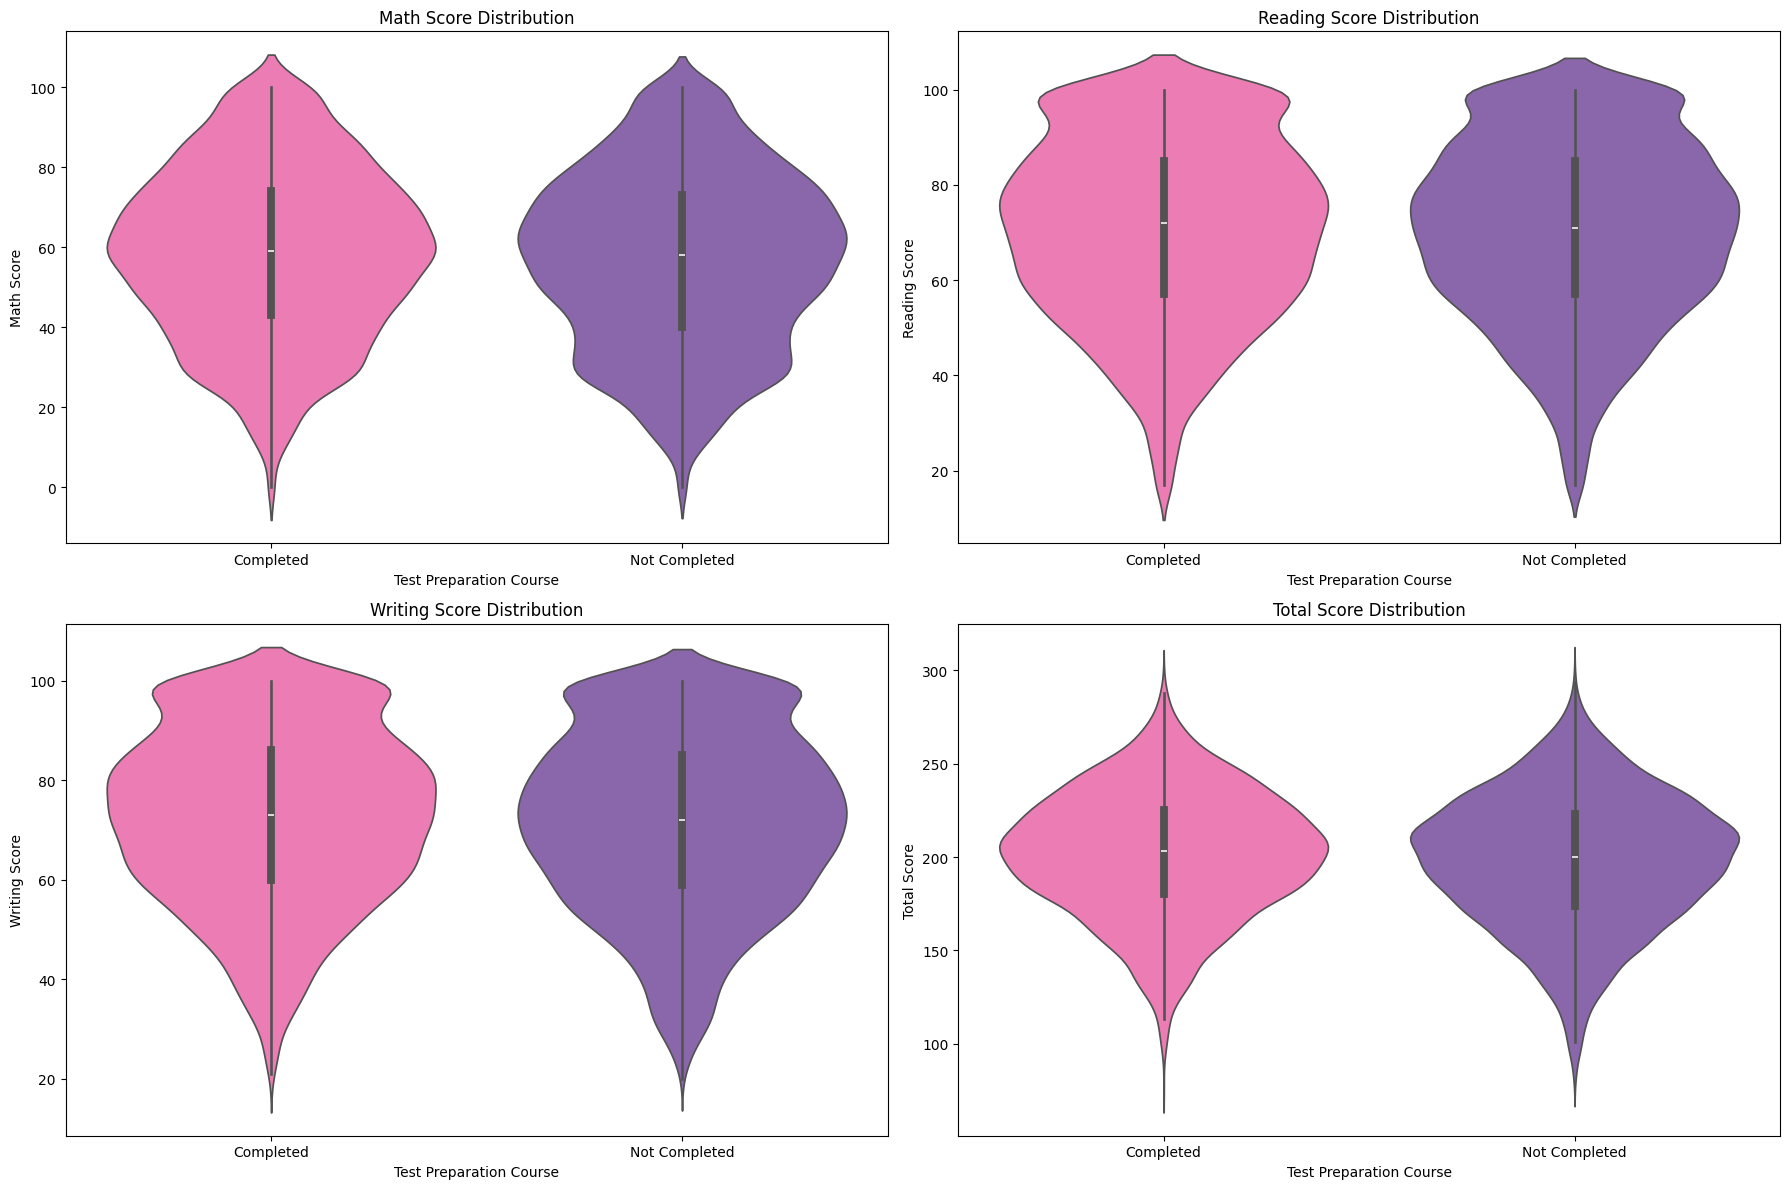

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the custom colors
pink = '#ff69b4'
purple = '#8b5cb5'

# Create a figure with 4 subplots
fig, axes = plt.subplots(2, 2, figsize=(18, 12))

# Violin plot for Math Score
sns.violinplot(x='test_preparation_course', y='math_score', data=df, ax=axes[0, 0], hue='test_preparation_course', palette=[pink, purple], legend=False)
axes[0, 0].set_title('Math Score Distribution')
axes[0, 0].set_xlabel('Test Preparation Course')
axes[0, 0].set_ylabel('Math Score')

# Violin plot for Reading Score
sns.violinplot(x='test_preparation_course', y='reading_score', data=df, ax=axes[0, 1], hue='test_preparation_course', palette=[pink, purple], legend=False)
axes[0, 1].set_title('Reading Score Distribution')
axes[0, 1].set_xlabel('Test Preparation Course')
axes[0, 1].set_ylabel('Reading Score')

# Violin plot for Writing Score
sns.violinplot(x='test_preparation_course', y='writing_score', data=df, ax=axes[1, 0], hue='test_preparation_course', palette=[pink, purple], legend=False)
axes[1, 0].set_title('Writing Score Distribution')
axes[1, 0].set_xlabel('Test Preparation Course')
axes[1, 0].set_ylabel('Writing Score')

# Violin plot for Total Score
df['total_score'] = df['math_score'] + df['reading_score'] + df['writing_score']
sns.violinplot(x='test_preparation_course', y='total_score', data=df, ax=axes[1, 1], hue='test_preparation_course', palette=[pink, purple], legend=False)
axes[1, 1].set_title('Total Score Distribution')
axes[1, 1].set_xlabel('Test Preparation Course')
axes[1, 1].set_ylabel('Total Score')

plt.tight_layout()
plt.show()

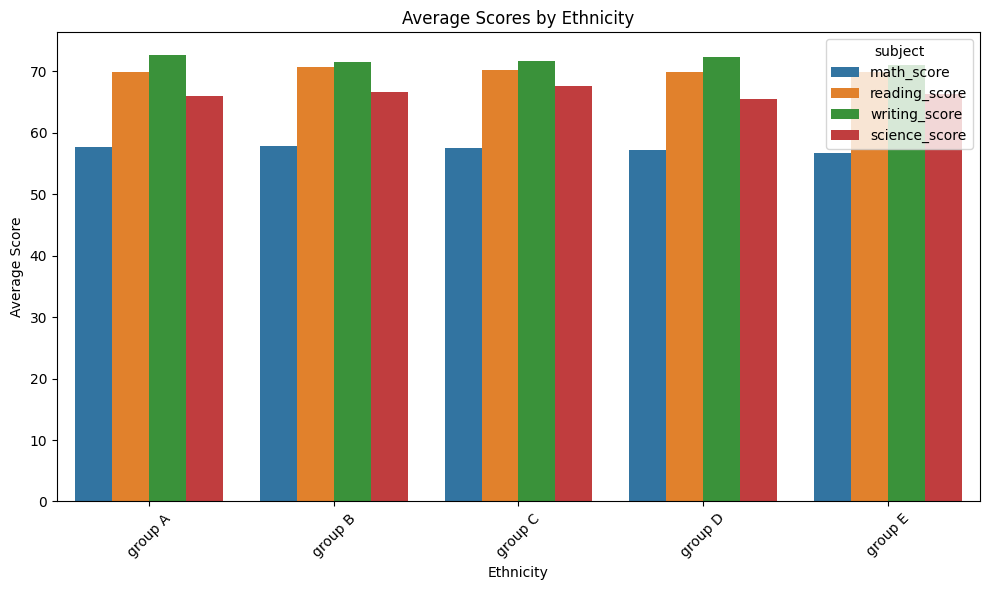

In [39]:
##################avg scores by ethnicity (bar plot)######################################''''''
# Calculate the average scores for each ethnicity
average_scores_by_ethnicity = df.groupby('race_ethnicity')[['math_score', 'reading_score', 'writing_score', 'science_score']].mean()

# Reset index to make 'ethnicity' a column again for plotting
average_scores_by_ethnicity = average_scores_by_ethnicity.reset_index()

# Melt the DataFrame into long format for plotting
long_format = average_scores_by_ethnicity.melt(id_vars='race_ethnicity', var_name='subject', value_name='average_score')

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='race_ethnicity', y='average_score', hue='subject', data=long_format)

# Customize the plot
plt.title('Average Scores by Ethnicity')
plt.xlabel('Ethnicity')
plt.ylabel('Average Score')
plt.xticks(rotation=45)
plt.tight_layout()

# Show plot
plt.show()

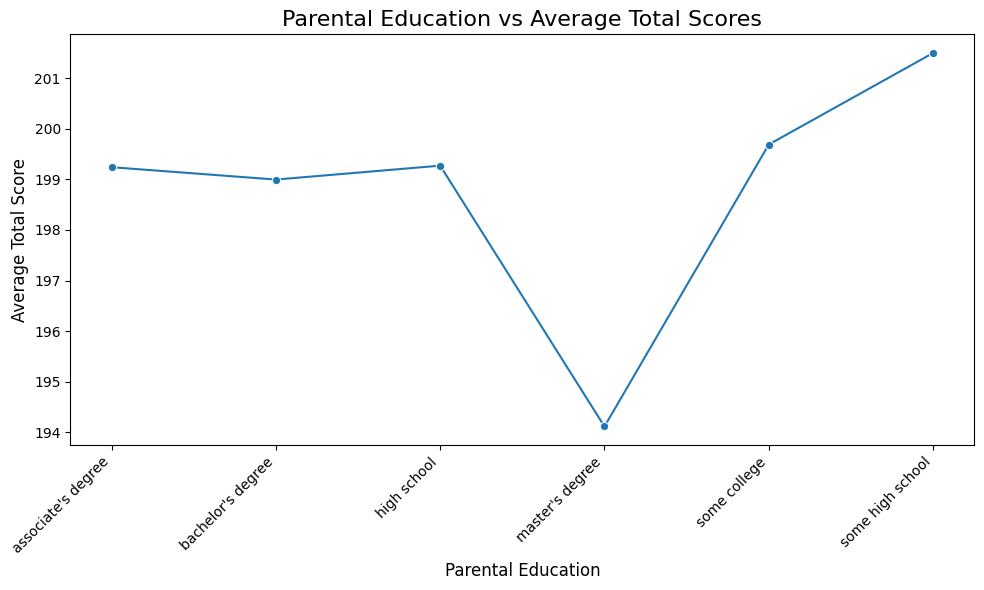

In [40]:
##################parental education vs. avg total scores (line plot)#####################''''''
# calculate the avg scores for each 
avg_scores_by_ed = df.groupby('parental_level_of_education')['total_score'].mean().reset_index()

# Plot the line plot
plt.figure(figsize=(10, 6))
sns.lineplot(x='parental_level_of_education', y='total_score', data=avg_scores_by_ed, marker='o')

# Adding labels and title
plt.title('Parental Education vs Average Total Scores', fontsize=16)
plt.xlabel('Parental Education', fontsize=12)
plt.ylabel('Average Total Score', fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotate x labels for better visibility

# Show the plot
plt.tight_layout()
plt.show()

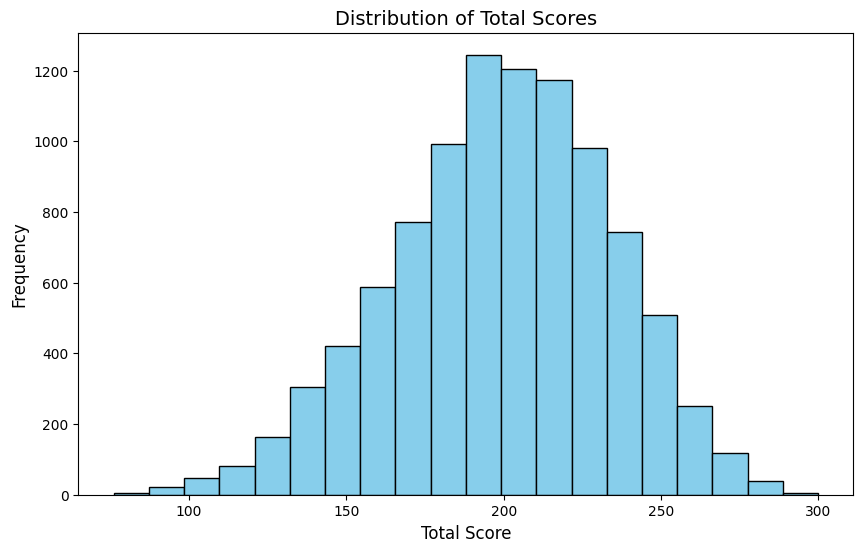

In [41]:
########################total score dist. (histogram)#####################################''''''
# Plotting histogram
plt.figure(figsize=(10, 6))
plt.hist(df['total_score'], bins=20, edgecolor='black', color='skyblue')

# Adding titles and labels
plt.title('Distribution of Total Scores', fontsize=14)
plt.xlabel('Total Score', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Display the plot
plt.show()